In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
import requests
import io
import apache_log_parser
from pprint import pprint
import os

In [2]:
csv = pd.read_csv("FB-2009_samples_24_times_1hr_0.tsv",   delimiter='\t', names=["new_unique_job_id", "submit_time_seconds", "inter_job_submit_gap_seconds", "map_input_bytes", "shuffle_bytes", "reduce_output_bytes"])
csv

,new_unique_job_id,submit_time_seconds,inter_job_submit_gap_seconds,map_input_bytes,shuffle_bytes,reduce_output_bytes
0,job0,49,49,740773,2339561,627471
1,job1,101,52,736346,1700537,432269
2,job2,122,21,267631,594312,233549
3,job3,197,75,233422,42,37
4,job4,208,11,3623279,0,9838062
...,...,...,...,...,...,...
5889,job5889,86384,6,137866369,563874958,134596091
5890,job5890,86393,9,38760,0,266496
5891,job5891,86394,1,26696479780,78256050458,24810560
5892,job5892,86401,7,15198,0,91977


In [3]:
csv.submit_time_seconds

0          49
1         101
2         122
3         197
4         208
        ...  
5889    86384
5890    86393
5891    86394
5892    86401
5893    86404
Name: submit_time_seconds, Length: 5894, dtype: int64

In [4]:
bin = pd.cut(csv.submit_time_seconds,  list(range(0, 90000, 600)))
bin_values = bin.value_counts(sort=False)
bin_values

(0, 600]          11
(600, 1200]       10
(1200, 1800]      13
(1800, 2400]      11
(2400, 3000]      16
                  ..
(86400, 87000]     2
(87000, 87600]     0
(87600, 88200]     0
(88200, 88800]     0
(88800, 89400]     0
Name: submit_time_seconds, Length: 149, dtype: int64

<AxesSubplot: >

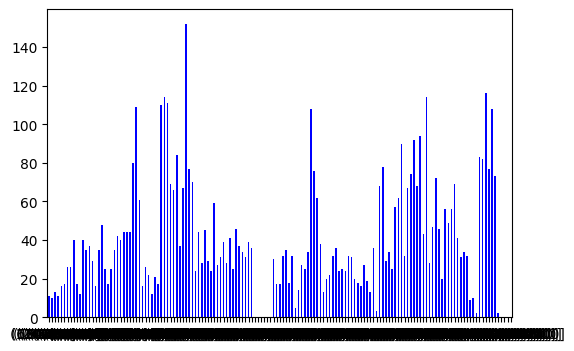

In [34]:
bin_values.plot.bar(rot=0, color="b", figsize=(6,4))

In [35]:
csv_2009_01 = pd.read_csv("FB-2009_samples_24_times_1hr_1.tsv",   delimiter='\t', names=["new_unique_job_id", "submit_time_seconds", "inter_job_submit_gap_seconds", "map_input_bytes", "shuffle_bytes", "reduce_output_bytes"])
csv_2009_01

,new_unique_job_id,submit_time_seconds,inter_job_submit_gap_seconds,map_input_bytes,shuffle_bytes,reduce_output_bytes
0,job0,23,23,410483,0,2513586060
1,job1,126,103,51616,0,2671606188
2,job2,135,9,1048668636,0,149442587
3,job3,154,19,10240,0,120268108
4,job4,171,17,24812136,0,6566944
...,...,...,...,...,...,...
6633,job6633,86366,6,12740,0,86463
6634,job6634,86379,13,23716,0,169445
6635,job6635,86383,4,50400,0,393007835
6636,job6636,86389,6,7644,0,56336


In [36]:
bin_2009_01 = pd.cut(csv_2009_01.submit_time_seconds,  list(range(0, 90000, 600)))
bin_2009_01_values = bin_2009_01.value_counts(sort=False)
bin_2009_01_values

(0, 600]          34
(600, 1200]       31
(1200, 1800]      46
(1800, 2400]      46
(2400, 3000]      29
                  ..
(86400, 87000]     1
(87000, 87600]     0
(87600, 88200]     0
(88200, 88800]     0
(88800, 89400]     0
Name: submit_time_seconds, Length: 149, dtype: int64

<AxesSubplot: >

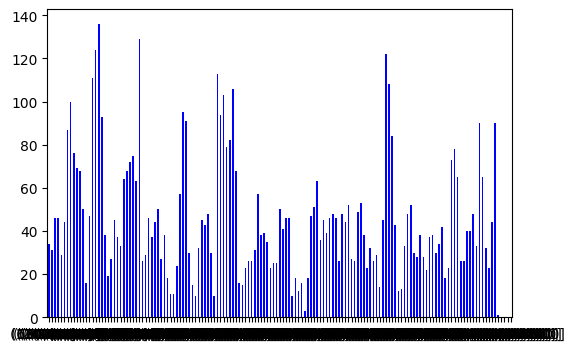

In [37]:
bin_2009_01_values.plot.bar(rot=0, color="b", figsize=(6,4))

In [38]:
csv_2010_00 = pd.read_csv("FB-2010_samples_24_times_1hr_0.tsv",   delimiter='\t', names=["new_unique_job_id", "submit_time_seconds", "inter_job_submit_gap_seconds", "map_input_bytes", "shuffle_bytes", "reduce_output_bytes"])
csv_2010_00

,new_unique_job_id,submit_time_seconds,inter_job_submit_gap_seconds,map_input_bytes,shuffle_bytes,reduce_output_bytes
0,job0,9,9,1762,0,14347
1,job1,18,9,970,609,697
2,job2,20,2,53088744165,1510005522,5759777
3,job3,22,2,61873748853,1387369304,5840114
4,job4,25,3,404,22,191
...,...,...,...,...,...,...
24437,job24437,86405,7,534399388,0,534470138
24438,job24438,86406,1,193489,395367,314
24439,job24439,86406,0,191000,22,55
24440,job24440,86407,1,1,49,0


In [39]:
bin_2010_00 = pd.cut(csv_2010_00.submit_time_seconds,  list(range(0, 90000, 600)))
bin_2010_00_values = bin_2010_00.value_counts(sort=False)
bin_2010_00_values

(0, 600]          149
(600, 1200]       154
(1200, 1800]      134
(1800, 2400]      148
(2400, 3000]      175
                 ... 
(86400, 87000]      5
(87000, 87600]      0
(87600, 88200]      0
(88200, 88800]      0
(88800, 89400]      0
Name: submit_time_seconds, Length: 149, dtype: int64

<AxesSubplot: >

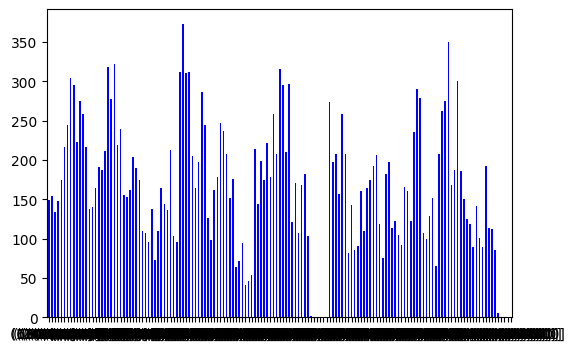

In [40]:
bin_2010_00_values.plot.bar(rot=0, color="b", figsize=(6,4))

In [6]:
csv_2010_samples_24 = pd.read_csv("FB-2010_samples_24_times_1hr_withInputPaths_0.tsv",   delimiter='\t', names=["new_unique_job_id", "submit_time_seconds", "inter_job_submit_gap_seconds", "map_input_bytes", "shuffle_bytes", "reduce_output_bytes", "null1", "null2", "null3"])
csv_2010_samples_24

,new_unique_job_id,submit_time_seconds,inter_job_submit_gap_seconds,map_input_bytes,shuffle_bytes,reduce_output_bytes,null1,null2,null3
0,job0,1,1,2267942,0,1937944,inputPath1,NaN,NaN
1,job1,2,1,20791551476,12295202125,1491950225,inputPath2,NaN,NaN
2,job2,2,0,90015105,110986156,2783997,inputPath3,NaN,NaN
3,job3,2,0,945,0,2668,inputPath4,NaN,NaN
4,job4,2,0,4654241,0,3938427,inputPath5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25423,job25423,86394,2,88651875,22,127,inputPath17155,NaN,NaN
25424,job25424,86400,6,96512,0,0,inputPath17124,NaN,NaN
25425,job25425,86402,2,15403,8550,110263,inputPath17156,NaN,NaN
25426,job25426,86407,5,5840277,22,127,inputPath17157,NaN,NaN


In [7]:
bin_2010_samples_24 = pd.cut(csv_2010_samples_24.submit_time_seconds,  list(range(0, 90000, 600)))
bin_2010_samples_24_values = bin_2010_samples_24.value_counts(sort=False)
bin_2010_samples_24_values

(0, 600]          125
(600, 1200]        97
(1200, 1800]      168
(1800, 2400]      312
(2400, 3000]      211
                 ... 
(86400, 87000]      3
(87000, 87600]      0
(87600, 88200]      0
(88200, 88800]      0
(88800, 89400]      0
Name: submit_time_seconds, Length: 149, dtype: int64

<AxesSubplot: >

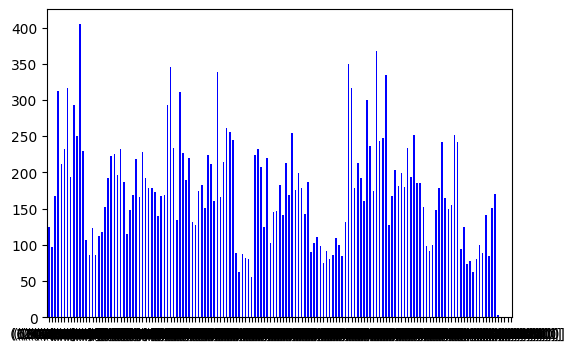

In [8]:
bin_2010_samples_24_values.plot.bar(rot=0, color="b", figsize=(6,4))

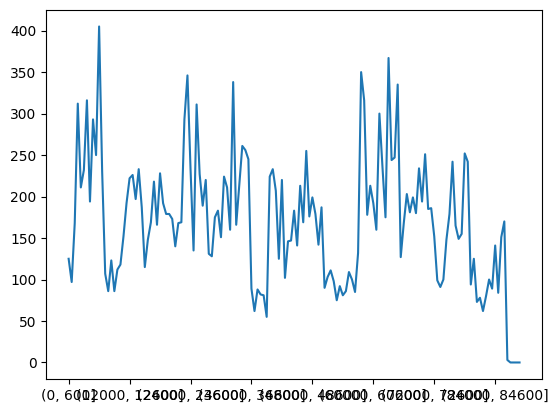

In [12]:
bin_2010_samples_24_values.plot(kind='line')
plt.savefig("FB-2010_samples_24_times_1hr_withInputPaths_0.png")